In [2]:
import torch

if torch.cuda.is_available():
    print("GPU is available")
    print(f"GPU device name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available")

GPU is available
GPU device name: Tesla T4


In [3]:
# 배열
import numpy as np

# 데이터 분석
import pandas as pd

In [4]:
# Pandas option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [5]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Jupyter note상에 그래프 결과 포함 매직 명령
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [7]:
import sys

!echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

# 나눔 폰트를 설치합니다.
!sudo apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# 나눔바른고딕 폰트로 설정합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 표시 오류 수정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: DbDriver "passwords" warning: could not open /var/cache/debconf/passwords.dat: Permission denied
debconf: DbDriver "config": could not write /var/cache/debconf/config.dat-new: Permission denied


In [8]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [9]:
# Tensorflow
import tensorflow as tf

2024-10-20 11:46:58.324491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 11:46:58.346499: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 11:46:58.353267: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 11:46:58.371369: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 11:46:59.425504: W tensorflow/compiler/tf2

In [10]:
# Tensorflow Sequential model
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Embedding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model, to_categorical

In [11]:
# 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split

In [12]:
# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

In [13]:
import gc

def gc_collect():
    gc.collect()

# 데이터 로드

## 1Cycle

### 1. 클라우드 스토리지 연동

In [14]:
# !pip install librosa google-cloud-storage soundfile

In [15]:
# import soundfile as sf
# from google.cloud import storage
# from io import BytesIO
# from collections import defaultdict

In [16]:
# #클라이언트 생성
# client = storage.Client()

In [17]:
# # 버킷 및 기본 폴더 경로 설정
# bucket_name = 'voicemodel'
# base_folder = 'data/'

In [18]:
# # 버킷 가져오기
# bucket = client.get_bucket(bucket_name)

In [19]:
# # 경로와 폴더명 저장할 초기 list 생성
# folder_name = []
# file_path = []

In [20]:
# # data 폴더 안의 모드 파일 가져오기
# blobs = bucket.list_blobs(prefix=base_folder)

In [21]:
# # 파일 반복 처리
# for blob in blobs:
#     # 폴더 이름 저장
#     folder_name.append(blob.name.split('/')[1])
#     # 경로 저장
#     file_path.append(blob.name)

### 2. 라벨링 데이터 로드

In [22]:
# # 라벨링 데이터 로드
# labeling = pd.read_csv('./data/csv/labeling.csv', low_memory=False)

# # 감정 데이터 길이 확장
# repeated_emotion = labeling['감정'].tolist() * (len(file_path) // len(labeling) + 1)
# repeated_emotion = repeated_emotion[:len(file_path)]  # 파일 수에 맞게 자르기

In [23]:
# # 데이터프레임 생성
# label_df = pd.DataFrame({
#     'folder_name': folder_name,
#     'file_path': file_path,
#     'emotion': repeated_emotion
# })

In [24]:
# # 결측치 확인(사용하지 않는 감정 데이터 확인)
# label_df.isnull().sum()

In [25]:
# # 데이터 프레임 복제
# labeling_df = label_df.copy()

# # 결측치 제거 (사용하지 않는 감정 데이터 제거)
# labeling_df.dropna(inplace=True)

# # 제거 확인
# labeling_df.isnull().sum()

### 3. 음성 데이터 로드

In [26]:
# # 데이터 모아두는 초기 list 생성
# audio_data = []

# for index, row in labeling_df.iterrows():
#     # file_path에 해당하는 blob 객체 생성
#     blob = bucket.blob(row['file_path'])

#     # 음성 파일 메모리에 로드
#     data = blob.download_as_bytes()

#     # 메모리에서 직접 로드하여 librosa로 처리
#     with BytesIO(data) as audio_file:
#         y, sr = librosa.load(audio_file)
#         audio_data.append((y, sr, row['file_path']))

#### ○ 트러블 슈팅
메모리에 음성을 로드하는 방법은 메모리 사용량이 상당하여  
음성 로드에 너무 많은 시간이 소요될 뿐만아니라, 메모리 부족 현상이 나타남.  
gcsfuse를 통해 GCS 버킷 마운트 방법을 모색하려고 함. 

## 2Cycle

### 1. gcsfuse 마운트

https://cloud.google.com/storage/docs/gcsfuse-mount?hl=ko  

1. gcsfuse 설치  
```
sudo apt install gcsfuse
```

- 오류 코드: ```Unable to locate package gcsfuse```  
- gcsfuse 패키지 저장소가 시스템에 추가되지 않아서 발생  
- GCS Fuse 저장소를 수동으로 추가하고 설치  

<br>

1.1. 터미널에서  
- GCS Fuse 저장소 추가  
```echo "deb http://packages.cloud.google.com/apt gcsfuse-$(lsb_release -c -s) main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list```

- Google Cloud APT 키 추가  
```curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -```

- 패키지 목록 업데이트 및 gcsfuse 설치  
```sudo apt update```  
```sudo apt install gcsfuse```  

<br>

2. 디렉토리 생성  
```
sudo mkdir -p /mnt/gcs-bucket
```

- 권한 문제로 작동하지 않아 아래 방법으로 진행  

```mkdir mnt```  
```cd mnt```  
```mkdir gcs-bucket``` 

<br>

3. 마운트  
```gcsfuse 버킷이름 마운드포인트```  

<br>

3.1. 권한문제 발생 시    
```sudo gcsfuse -o allow_other --implicit-dirs 버킷이름 마운드포인트```

<br>

4. 마운트 해제  
```fusermount -u /mnt/gcs-bucket```

<br>

5. 연결 자동화
bucket mount 시 매번 입력하는 번거로움을 줄이기
bucket_monut를 단축키로 명령어 자동 입력  

```
vim ~/.bashrc
```
```
function bucket_mount() {
    echo "deb http://packages.cloud.google.com/apt gcsfuse-$(lsb_release -c -s) main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list
    curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
    sudo apt update
    sudo apt install -y gcsfuse
    sudo gcsfuse -o allow_other --implicit-dirs 버킷이름 마운드포인
}
alias bucket_mount=bucket_mount
```

In [27]:
import os
from glob import glob

# 데이터 경로 담기
wav_data = '/mnt/gcs-bucket/data/'

# 해당 경로를 통해 폴더 찾기
directories = glob(os.path.join(wav_data, '*'))

In [28]:
directories

['/mnt/gcs-bucket/data/F2001',
 '/mnt/gcs-bucket/data/F2002',
 '/mnt/gcs-bucket/data/F2003',
 '/mnt/gcs-bucket/data/F2004',
 '/mnt/gcs-bucket/data/F2005',
 '/mnt/gcs-bucket/data/F2006',
 '/mnt/gcs-bucket/data/F2007',
 '/mnt/gcs-bucket/data/F2008',
 '/mnt/gcs-bucket/data/F2009',
 '/mnt/gcs-bucket/data/F2010',
 '/mnt/gcs-bucket/data/F2011',
 '/mnt/gcs-bucket/data/F2012',
 '/mnt/gcs-bucket/data/F2013',
 '/mnt/gcs-bucket/data/F2014',
 '/mnt/gcs-bucket/data/F2015',
 '/mnt/gcs-bucket/data/F2016',
 '/mnt/gcs-bucket/data/F2017',
 '/mnt/gcs-bucket/data/F2018',
 '/mnt/gcs-bucket/data/F2019',
 '/mnt/gcs-bucket/data/F2020',
 '/mnt/gcs-bucket/data/F2021',
 '/mnt/gcs-bucket/data/F2022',
 '/mnt/gcs-bucket/data/F2023',
 '/mnt/gcs-bucket/data/F2024',
 '/mnt/gcs-bucket/data/F2025',
 '/mnt/gcs-bucket/data/F2026',
 '/mnt/gcs-bucket/data/F2027',
 '/mnt/gcs-bucket/data/F2028',
 '/mnt/gcs-bucket/data/F2029',
 '/mnt/gcs-bucket/data/F2030',
 '/mnt/gcs-bucket/data/F2031',
 '/mnt/gcs-bucket/data/F2032',
 '/mnt/g

In [29]:
# 폴더 이름 저장할 초기 list 생성
dir_names = []

for directory in directories:
    # 디렉토리명 저장
    dir_names.append(os.path.basename(directory))

In [30]:
dir_names

['F2001',
 'F2002',
 'F2003',
 'F2004',
 'F2005',
 'F2006',
 'F2007',
 'F2008',
 'F2009',
 'F2010',
 'F2011',
 'F2012',
 'F2013',
 'F2014',
 'F2015',
 'F2016',
 'F2017',
 'F2018',
 'F2019',
 'F2020',
 'F2021',
 'F2022',
 'F2023',
 'F2024',
 'F2025',
 'F2026',
 'F2027',
 'F2028',
 'F2029',
 'F2030',
 'F2031',
 'F2032',
 'F2033',
 'F2034',
 'F2035',
 'F2036',
 'F2037',
 'F2038',
 'F2039',
 'F2040',
 'F2041',
 'F2042',
 'F2043',
 'F2044',
 'F2045',
 'F2046',
 'F2047',
 'F2048',
 'F2049',
 'F2050',
 'F2051',
 'F2052',
 'F2053',
 'F2054',
 'F2055',
 'F2056',
 'F2057',
 'F2058',
 'F2059',
 'F2060',
 'F2061',
 'F2062',
 'F2063',
 'F2064',
 'F2065',
 'F2066',
 'F2067',
 'F2068',
 'F2069',
 'F2070',
 'F2071',
 'F2072',
 'F2073',
 'F3001',
 'F3002',
 'F3003',
 'F3004',
 'F3005',
 'F3006',
 'F3007',
 'F3008',
 'F3009',
 'F3010',
 'F3011',
 'F3012',
 'F3013',
 'F3014',
 'F3015',
 'F3016',
 'F3017',
 'F3018',
 'F3019',
 'F3020',
 'F3021',
 'F3022',
 'F3023',
 'F3024',
 'F3025',
 'F3026',
 'F3027',


In [31]:
# 파일 경로 저장할 초기 list 생성
file_paths = []

for dir_name in dir_names:
    # 파일 경로 담기
    wav_file = f'/mnt/gcs-bucket/data/{dir_name}/'
    # 해당 경로를 통해 파일 찾기
    file_paths.extend(sorted(glob(os.path.join(wav_file, '*'))))

In [32]:
file_paths

['/mnt/gcs-bucket/data/F2001/F2001_000001.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000002.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000003.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000004.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000005.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000006.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000007.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000008.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000009.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000010.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000011.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000012.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000013.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000014.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000015.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000016.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000017.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000018.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000019.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000020.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_00002

In [33]:
# 파일 이름 저장할 초기 list 생성
file_names = []

for file_path in file_paths:
    # 파일 이름 저장
    file_names.append(os.path.basename(file_path))

In [34]:
# 폴더 이름 추출
folder_names = [f.split('_')[0] for f in file_names]

In [35]:
# 성별을 분류하는 코드
gender_labels = ['F' if name.startswith('F') else 'M' for name in folder_names]

In [36]:
# 라벨링 데이터 로드
labeling = pd.read_csv('./data/csv/labeling.csv', low_memory=False)

# 감정 데이터 길이 확장
repeated_emotion = labeling['감정'].tolist() * (len(file_paths) // len(labeling) + 1)
repeated_emotion = repeated_emotion[:len(file_paths)]  # 파일 수에 맞게 자르기

In [37]:
# 데이터프레임 생성
label_df = pd.DataFrame({
    'folder_name': folder_names,
    'file_name': file_names,
    'file_path': file_paths,
    'gender': gender_labels,
    'emotion': repeated_emotion,
})

In [38]:
# 결측치 확인(사용하지 않는 감정 데이터 확인)
label_df.isnull().sum()

folder_name        0
file_name          0
file_path          0
gender             0
emotion        20000
dtype: int64

In [39]:
# 데이터 프레임 복제
labeling_df = label_df.copy()

# 결측치 제거 (사용하지 않는 감정 데이터 제거)
labeling_df.dropna(inplace=True)

# 제거 확인
labeling_df.isnull().sum()

folder_name    0
file_name      0
file_path      0
gender         0
emotion        0
dtype: int64

In [40]:
labeling_df

,folder_name,file_name,file_path,gender,emotion
0,F2001,F2001_000001.wav,/mnt/gcs-bucket/...,F,Sad
1,F2001,F2001_000002.wav,/mnt/gcs-bucket/...,F,Sad
2,F2001,F2001_000003.wav,/mnt/gcs-bucket/...,F,Sad
3,F2001,F2001_000004.wav,/mnt/gcs-bucket/...,F,Sad
4,F2001,F2001_000005.wav,/mnt/gcs-bucket/...,F,Sad
...,...,...,...,...,...
79995,M6003,M6003_000156.wav,/mnt/gcs-bucket/...,M,Calm
79996,M6003,M6003_000157.wav,/mnt/gcs-bucket/...,M,Calm
79997,M6003,M6003_000158.wav,/mnt/gcs-bucket/...,M,Calm
79998,M6003,M6003_000159.wav,/mnt/gcs-bucket/...,M,Calm


# 데이터 분석

## 1. csv 데이터 분석

In [41]:
# 데이터 정보
labeling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   folder_name  60000 non-null  object
 1   file_name    60000 non-null  object
 2   file_path    60000 non-null  object
 3   gender       60000 non-null  object
 4   emotion      60000 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


In [42]:
# 상위 5개 데이터 추출
labeling_df.head()

,folder_name,file_name,file_path,gender,emotion
0,F2001,F2001_000001.wav,/mnt/gcs-bucket/...,F,Sad
1,F2001,F2001_000002.wav,/mnt/gcs-bucket/...,F,Sad
2,F2001,F2001_000003.wav,/mnt/gcs-bucket/...,F,Sad
3,F2001,F2001_000004.wav,/mnt/gcs-bucket/...,F,Sad
4,F2001,F2001_000005.wav,/mnt/gcs-bucket/...,F,Sad


In [43]:
# 상위 5개 데이터 추출
labeling_df.tail()

,folder_name,file_name,file_path,gender,emotion
79995,M6003,M6003_000156.wav,/mnt/gcs-bucket/...,M,Calm
79996,M6003,M6003_000157.wav,/mnt/gcs-bucket/...,M,Calm
79997,M6003,M6003_000158.wav,/mnt/gcs-bucket/...,M,Calm
79998,M6003,M6003_000159.wav,/mnt/gcs-bucket/...,M,Calm
79999,M6003,M6003_000160.wav,/mnt/gcs-bucket/...,M,Calm


In [44]:
# 중복행 확인
labeling_df.duplicated().sum()

0

In [45]:
# 결측치 확인
labeling_df.isnull().sum()

folder_name    0
file_name      0
file_path      0
gender         0
emotion        0
dtype: int64

In [46]:
# 결측치 확인
labeling_df.isna().sum()

folder_name    0
file_name      0
file_path      0
gender         0
emotion        0
dtype: int64

In [47]:
# 타겟 데이터 개수 확인
label_counts = labeling_df.emotion.value_counts().reset_index()
label_counts

,emotion,count
0,Sad,10000
1,Happiness,10000
2,Angry,10000
3,Surprise,10000
4,Fear,10000
5,Calm,10000


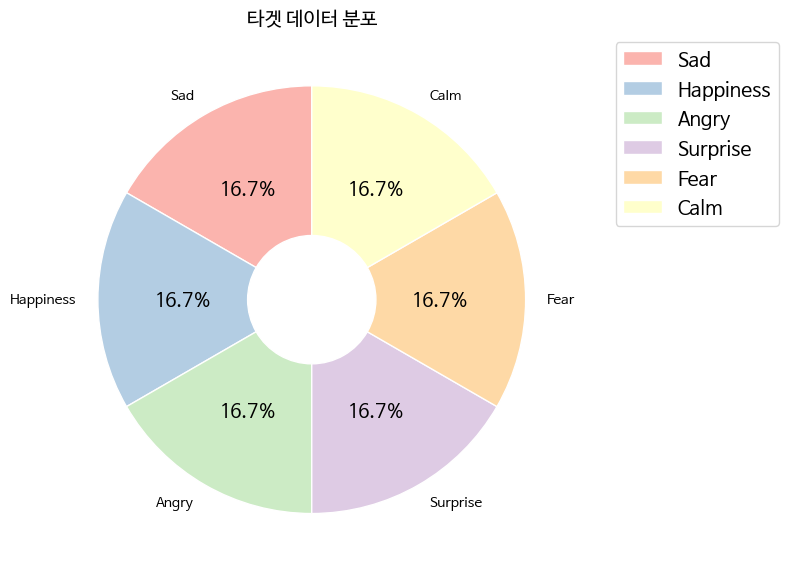

In [48]:
# 타겟 데이터 분포 확인

# 부채꼴 스타일
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

counts = label_counts['count']
labels = label_counts['emotion']

# 그래프 크기 설정
plt.figure(figsize=(20, 6))

# 그래프 그리기
plt.pie(counts, labels=labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
plt.title('타겟 데이터 분포')

# 범례를 그래프 오른쪽에 배치
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 2. 음성 데이터 분석

In [49]:
import librosa
import librosa.display

In [50]:
# # 발화 시간을 저장할 리스트
# durations = []

# for index, row in labeling_df.iterrows():
#     y, sr = librosa.load(row['file_path'])
#     duration = librosa.get_duration(y=y, sr=sr)
#     durations.append(duration)

# # 발화 시간 분포 시각화
# plt.figure(figsize=(10, 6))

# plt.hist(durations, colors=outer_colors[0], bins=30, edgecolor='black')
# plt.title("Distribution of Speech Durations")
# plt.xlabel("Duration (seconds)")
# plt.ylabel("Frequency")
# plt.show()

In [51]:
# for index, row in random_sad.iterrows():
#     # file_path에 해당하는 blob 객체 생성
#     blob = bucket.blob(row['file_path'])

#     # 음성 파일 메모리에 로드
#     data = blob.download_as_bytes()

#     # 메모리에서 직접 로드하여 librosa로 처리
#     with BytesIO(data) as audio_file:
#         y, sr = librosa.load(audio_file)


#     # 파형 그래프 그리기
#     plt.figure(figsize=(10, 4))
#     librosa.display.waveshow(y, sr=sr)
#     plt.title(f"{row['file_path']}")
#     plt.show()

In [52]:
# import librosa
# import matplotlib.pyplot as plt

# # 마운트된 GCS 파일 경로를 바로 사용
# file_path = '/mnt/gcs-bucket/data/F2001/F2001_000001.wav'
# y, sr = librosa.load(file_path)

# # 파형 그래프 그리기
# plt.figure(figsize=(10, 4))
# librosa.display.waveshow(y, sr=sr)
# plt.title("Waveform")
# plt.show()

# 모델 훈련

## 1. 레이블 인코딩

In [53]:
labeling_label_df = labeling_df.copy()
labeling_label_df

,folder_name,file_name,file_path,gender,emotion
0,F2001,F2001_000001.wav,/mnt/gcs-bucket/...,F,Sad
1,F2001,F2001_000002.wav,/mnt/gcs-bucket/...,F,Sad
2,F2001,F2001_000003.wav,/mnt/gcs-bucket/...,F,Sad
3,F2001,F2001_000004.wav,/mnt/gcs-bucket/...,F,Sad
4,F2001,F2001_000005.wav,/mnt/gcs-bucket/...,F,Sad
...,...,...,...,...,...
79995,M6003,M6003_000156.wav,/mnt/gcs-bucket/...,M,Calm
79996,M6003,M6003_000157.wav,/mnt/gcs-bucket/...,M,Calm
79997,M6003,M6003_000158.wav,/mnt/gcs-bucket/...,M,Calm
79998,M6003,M6003_000159.wav,/mnt/gcs-bucket/...,M,Calm


### ○ gender

In [54]:
# gender 컬럼에서 고유 감정 레이블 추출
unique_gender = labeling_label_df['gender'].unique()

In [55]:
unique_gender

array(['F', 'M'], dtype=object)

In [56]:
# 레이블과 숫자를 매핑하는 딕셔너리 생성
gen_label2id = {gender: idx for idx, gender in enumerate(unique_gender)}
gen_id2label = {idx: gender for idx, gender in enumerate(unique_gender)}

In [57]:
gen_id2label

{0: 'F', 1: 'M'}

In [58]:
# gender 컬럼을 숫자로 변환 (벡터로 매핑)
labeling_label_df['gender'] = labeling_label_df['gender'].map(gen_label2id)

### ○ emotion

In [59]:
# emotion 컬럼에서 고유 감정 레이블 추출
unique_emotions = labeling_label_df['emotion'].unique()

In [60]:
unique_emotions

array(['Sad', 'Happiness', 'Angry', 'Surprise', 'Fear', 'Calm'],
      dtype=object)

In [61]:
# 레이블과 숫자를 매핑하는 딕셔너리 생성
emo_label2id = {emotion: idx for idx, emotion in enumerate(unique_emotions)}
emo_id2label = {idx: emotion for idx, emotion in enumerate(unique_emotions)}

In [62]:
emo_id2label

{0: 'Sad', 1: 'Happiness', 2: 'Angry', 3: 'Surprise', 4: 'Fear', 5: 'Calm'}

In [63]:
# emotion 컬럼을 숫자로 변환 (벡터로 매핑)
labeling_label_df['emotion'] = labeling_label_df['emotion'].map(emo_label2id)

In [64]:
labeling_label_df

,folder_name,file_name,file_path,gender,emotion
0,F2001,F2001_000001.wav,/mnt/gcs-bucket/...,0,0
1,F2001,F2001_000002.wav,/mnt/gcs-bucket/...,0,0
2,F2001,F2001_000003.wav,/mnt/gcs-bucket/...,0,0
3,F2001,F2001_000004.wav,/mnt/gcs-bucket/...,0,0
4,F2001,F2001_000005.wav,/mnt/gcs-bucket/...,0,0
...,...,...,...,...,...
79995,M6003,M6003_000156.wav,/mnt/gcs-bucket/...,1,5
79996,M6003,M6003_000157.wav,/mnt/gcs-bucket/...,1,5
79997,M6003,M6003_000158.wav,/mnt/gcs-bucket/...,1,5
79998,M6003,M6003_000159.wav,/mnt/gcs-bucket/...,1,5


In [65]:
labeling_label_df = labeling_label_df[['file_path', 'gender', 'emotion']]
labeling_label_df

,file_path,gender,emotion
0,/mnt/gcs-bucket/...,0,0
1,/mnt/gcs-bucket/...,0,0
2,/mnt/gcs-bucket/...,0,0
3,/mnt/gcs-bucket/...,0,0
4,/mnt/gcs-bucket/...,0,0
...,...,...,...
79995,/mnt/gcs-bucket/...,1,5
79996,/mnt/gcs-bucket/...,1,5
79997,/mnt/gcs-bucket/...,1,5
79998,/mnt/gcs-bucket/...,1,5


## 2. 데이터 분리

In [66]:
# from sklearn.model_selection import train_test_split

In [67]:
# # 훈련/테스트 데이터 분리
# train_co_df, test_df = \
# train_test_split(labeling_label_df, test_size=0.2, stratify=labeling_label_df['emotion'], random_state=42)

# # 훈련/검증 데이터 분리
# train_df, val_df = \
# train_test_split(train_co_df, test_size=0.2, stratify=train_co_df['emotion'], random_state=42)

# # stratify=labeling_label_df['emotion'] : emotion 기준으로 각 데이터 셋에 고르게 분포

In [68]:
# train_df.to_csv('./data/csv/train_df.csv', index=True, encoding='utf-8')
# val_df.to_csv('./data/csv/val_df.csv', index=True, encoding='utf-8')
# test_df.to_csv('./data/csv/test_df.csv', index=True, encoding='utf-8')

In [69]:
train_df = pd.read_csv('./data/csv/train_df.csv', encoding='utf-8', index_col=0)
val_df = pd.read_csv('./data/csv/val_df.csv', encoding='utf-8', index_col=0)
test_df = pd.read_csv('./data/csv/test_df.csv', encoding='utf-8', index_col=0)

In [70]:
train_df

,file_path,gender,emotion
49636,/mnt/gcs-bucket/...,1,1
24108,/mnt/gcs-bucket/...,0,4
27702,/mnt/gcs-bucket/...,0,0
36984,/mnt/gcs-bucket/...,0,0
55404,/mnt/gcs-bucket/...,1,2
...,...,...,...
21193,/mnt/gcs-bucket/...,0,3
36126,/mnt/gcs-bucket/...,0,3
53100,/mnt/gcs-bucket/...,1,5
4269,/mnt/gcs-bucket/...,0,4


In [71]:
val_df

,file_path,gender,emotion
29587,/mnt/gcs-bucket/...,0,5
72413,/mnt/gcs-bucket/...,1,4
5009,/mnt/gcs-bucket/...,0,2
66710,/mnt/gcs-bucket/...,1,5
27456,/mnt/gcs-bucket/...,0,4
...,...,...,...
36955,/mnt/gcs-bucket/...,0,5
71524,/mnt/gcs-bucket/...,1,0
13833,/mnt/gcs-bucket/...,0,3
5164,/mnt/gcs-bucket/...,0,2


In [72]:
test_df

,file_path,gender,emotion
52716,/mnt/gcs-bucket/...,1,3
75048,/mnt/gcs-bucket/...,1,0
49424,/mnt/gcs-bucket/...,1,5
57388,/mnt/gcs-bucket/...,1,4
16787,/mnt/gcs-bucket/...,0,5
...,...,...,...
60092,/mnt/gcs-bucket/...,1,4
40785,/mnt/gcs-bucket/...,1,5
5315,/mnt/gcs-bucket/...,0,1
77723,/mnt/gcs-bucket/...,1,3


### ○ 타겟 비중 확인

In [73]:
# 타겟 데이터 비중 확인
train_target = train_df.emotion.value_counts().reset_index()
validation_target = val_df.emotion.value_counts().reset_index()
test_target = test_df.emotion.value_counts().reset_index()

In [74]:
display(train_target)
display(validation_target)
display(test_target)

,emotion,count
0,1,6400
1,4,6400
2,0,6400
3,2,6400
4,3,6400
5,5,6400


,emotion,count
0,5,1600
1,4,1600
2,2,1600
3,0,1600
4,1,1600
5,3,1600


,emotion,count
0,3,2000
1,0,2000
2,5,2000
3,4,2000
4,1,2000
5,2,2000


## 3. 전처리 함수 정의

### ○ dummy

In [75]:
import soundfile as sf

In [76]:
# def preprocess_data(batch):
#     # 음성 파일 읽기
#     # batch(받아 올 데이터셋의 각 행)에 있는 file_path를 읽기
#     # 'speech_array'에 오디오 데이터(음성 데이터를 샘플 단위로 저장),
#     # 'sampling_rate'에 샘플링 레이트(초당 샘플 개수)를 저장
#     speech_array, sampling_rate = sf.read(batch['file_path'])
    
#     # processor로 입력 값 처리
#     inputs = processor(speech_array, sampling_rate=sampling_rate, return_tensors='pt', padding=True)

#     # 타겟 레이블 변환 (emotion)
#     batch["input_values"] = inputs.input_values[0]
#     batch["attention_mask"] = inputs.attention_mask[0]
#     batch["labels"] = processor(text=batch["emotion"], return_tensors="pt").input_ids[0]
    
#     return batch

#### ○ 트러블 슈팅
- 입력 코드
```
def preprocess_data(batch):
    # 음성 파일 읽기
    speech_array, sampling_rate = sf.read(batch['file_path'])
    # processor로 입력 값 처리
    inputs = processor(speech_array, sampling_rate=sampling_rate, return_tensors='pt', padding=True)

    # 타겟 레이블 변환 (emotion)
    batch["input_values"] = inputs.input_values[0]
    batch["attention_mask"] = inputs.attention_mask[0]
    batch["labels"] = processor(text=batch["emotion"], return_tensors="pt").input_ids[0]
    
    return batch
```

```
train_dataset = Dataset.from_pandas(train_df).map(preprocess_data)
val_dataset = Dataset.from_pandas(val_df).map(preprocess_data)
test_dataset = Dataset.from_pandas(test_df).map(preprocess_data)
```

<br>

- 오류 코드
```
ValueError: The model corresponding to this feature extractor: Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0.0,
  "return_attention_mask": false,
  "sampling_rate": 16000
}
 was trained using a sampling rate of 16000. Please make sure that the provided `raw_speech` input was sampled with 16000 and not 44100.
```

<br>

Wav2Vec2 모델이 16,000Hz로 샘플링된 오디오 데이터 사용  
현재 오디오 파일 샘플링 레이트가 44,100Hz로 추정되며, librosa를 사용해 16,000Hz로 변환 필요

In [77]:
# !pip install librosa

In [78]:
import librosa

In [79]:
# def preprocess_data(batch):
#     # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
#     speech_array, sampling_rate = librosa.load(batch["file_path"], sr=16000)
    
#     # processor로 입력값 처리
#     inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding=True)
    
#     # 타겟 레이블 변환 (emotion)
#     batch["input_values"] = inputs.input_values[0]
#     batch["attention_mask"] = inputs.attention_mask[0]
#     batch["labels"] = processor(text=batch["emotion"], return_tensors="pt").input_ids[0]
    
#     return batch

#### ○ 트러블 슈팅
- 입력 코드
```
def preprocess_data(batch):
    # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
    speech_array, sampling_rate = librosa.load(batch["file_path"], sr=16000)
    
    # processor로 입력값 처리
    inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding=True)
    
    # 타겟 레이블 변환 (emotion)
    batch["input_values"] = inputs.input_values[0]
    batch["attention_mask"] = inputs.attention_mask[0]
    batch["labels"] = processor(text=batch["emotion"], return_tensors="pt").input_ids[0]
    
    return batch
```

```
train_dataset = Dataset.from_pandas(train_df).map(preprocess_data)
val_dataset = Dataset.from_pandas(val_df).map(preprocess_data)
test_dataset = Dataset.from_pandas(test_df).map(preprocess_data)
```

<br>

- 오류 코드
```
KeyError: 'attention_mask'

During handling of the above exception, another exception occurred:
```

<br>

Wav2Vec2Processor의 일부 모델 설정에서 attention_mask가 기본적으로 포함되지 않기 때문에 발생  
attention_mask가 없는 경우, 조건으로 확인하여 오류 피하기

In [80]:
# def preprocess_data(batch):
#     # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
#     speech_array, _ = librosa.load(batch["file_path"], sr=16000)
    
#     # processor로 입력값 처리
#     # 모델이 사용 가능한 형식으로 오디오 데이터 변환
#     inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding=True)
    
#     # input_values 추가
#     batch["input_values"] = inputs.input_values[0]
    
#     # attention_mask가 있을 경우 추가
#     if "attention_mask" in inputs:
#         batch["attention_mask"] = inputs.attention_mask[0]
    
#     # 타겟 레이블 변환 (emotion)
#     batch["labels"] = processor(text=batch["emotion"], return_tensors="pt").input_ids[0]
    
#     return batch

#### ○ 트러블 슈팅
- 입력 코드
```
def preprocess_data(batch):
    # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
    speech_array, _ = librosa.load(batch["file_path"], sr=16000)
    
    # processor로 입력값 처리
    # 모델이 사용 가능한 형식으로 오디오 데이터 변환
    inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding=True)
    
    # input_values 추가
    batch["input_values"] = inputs.input_values[0]
    
    # attention_mask가 있을 경우 추가
    if "attention_mask" in inputs:
        batch["attention_mask"] = inputs.attention_mask[0]
    
    # 타겟 레이블 변환 (emotion)
    batch["labels"] = processor(text=batch["emotion"], return_tensors="pt").input_ids[0]
    
    return batch
```

```
train_dataset = Dataset.from_pandas(train_df).map(preprocess_data)
val_dataset = Dataset.from_pandas(val_df).map(preprocess_data)
test_dataset = Dataset.from_pandas(test_df).map(preprocess_data)
```

<br>

- 오류
  
<img src='https://github.com/user-attachments/assets/1467393c-da5d-4a35-b265-cadb569a433d' width='800'>

<br>

커널 다운 현상 발생 메모리 부족으로 판단됨,  
batched=True 옵션을 사용하거나 로드 단계와 데이터 변환 단계를 분리하여 진행

In [81]:
# def load_audio(batch):
#     # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
#     speech_array, _ = librosa.load(batch["file_path"], sr=16000)
    
#     # speech_array를 batch에 추가
#     batch["speech_array"] = speech_array
    
#     return batch

#### ○ 트러블 슈팅
- 입력 코드
```
def load_audio(batch):
    # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
    speech_array, _ = librosa.load(batch["file_path"], sr=16000)
    
    # speech_array를 batch에 추가
    batch["speech_array"] = speech_array
    
    return batch
```
```
# 데이터 프레임을 Hugging Face 데이터셋 형식으로 변환
# .map(preprocess_data) : 데이터셋의 각 데이터 행에 대해 preprocess_data 함수 호출하여 데이터 전처리
train_dataset = Dataset.from_pandas(train_df).map(load_audio, batched=True, batch_size=8)
val_dataset = Dataset.from_pandas(val_df).map(load_audio, batched=True, batch_size=8)
test_dataset = Dataset.from_pandas(test_df).map(load_audio, batched=True, batch_size=8)
```

<br>

- 오류
```
TypeError: Invalid file: ['/mnt/gcs-bucket/data/F2011/F2011_000129.wav', '/mnt/gcs-bucket/data/F3014/F3014_000035.wav', '/mnt/gcs-bucket/data/M3055/M3055_000099.wav', '/mnt/gcs-bucket/data/M3005/M3005_000151.wav', '/mnt/gcs-bucket/data/M2003/M2003_000058.wav', '/mnt/gcs-bucket/data/F4003/F4003_000101.wav', '/mnt/gcs-bucket/data/M3015/M3015_000104.wav', '/mnt/gcs-bucket/data/M2012/M2012_000127.wav']
```

<br>

`batched=True` 옵션을 추가하면서 문제 발생.  
`batched=True` 사용 시 배치가 리스트 형태로 전달되어, file_path가 단일 값이 아닌 리스트로 넘어옴.  
개별 처리가 가능하도록 개선.  

librosa.load(file_path, sr=16000)는 두 개의 값을 반환하는데,  
for 반복 문에서 리스트 형태로 받을 때,  
반환 요소가 튜플로 처리 되므로 튜플 언패킹을 추가로 설정이 필요함.

In [82]:
# def load_audio(batch):
#     # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
#     loaded_audio  = [librosa.load(file_path, sr=16000) for file_path in batch["file_path"]]
            
#     # 튜플 리스트에서 speech_array만 추출하여 batch에 추가
#     batch["speech_array"] = [audio[0] for audio in loaded_audio]
    
#     return batch

In [83]:
# def preprocess_data(batch):
#     # load_audio에서 추가한 speech_array를 사용
#     inputs = processor(
#         batch["speech_array"], 
#         sampling_rate=16000, 
#         return_tensors="pt", 
#         padding="longest",  # 가장 긴 샘플에 맞춰 패딩
#         truncation=True,  # 트렁케이션 설정
#         max_length=16000  # 적절한 max_length 설정
#     )
    
#     batch["input_values"] = inputs.input_values
    
#     if "attention_mask" in inputs:
#         batch["attention_mask"] = inputs.attention_mask
        
#     batch["labels"] = processor(
#         text=batch["emotion"], 
#         return_tensors="pt", 
#         padding=True, 
#         truncation=True, 
#         max_length=128
#     ).input_ids
    
#     # 메모리 절약을 위해 speech_array 제거
#     del batch["speech_array"]
    
#     return batch


#### ○ code review
1. load_audio

1.1. 변경 전
```
speech_array, sampling_rate = sf.read(batch['file_path'])
```

- `soundfile.read`를 사용했지만, Wav2Vec2 모델이 16,000Hz로 샘플링 데이터를 요구
- 샘플링 레이트 변환이 필요하여 `librosa.load` 사용

<br>

1.2. 변경 후  
```
speech_array, sampling_rate = librosa.load(batch["file_path"], sr=16000)
```

- sr=16000 : 오디오 데이터를 16,000Hz로 리샘플링 (모델이 요구하는 샘플링 레이트)
- speech_array: 샘플링된 오디오 데이터가 배열 형식으로 저장
- ampling_rate: 샘플링된 레이트 값(16,000Hz)을 반환

<br></br>

2. preprocess_data
```
inputs = processor(batch["speech_array"], sampling_rate=16000, return_tensors="pt", padding=True)
```

- processor로 입력값 처리
- 모델이 사용 가능한 형식으로 오디오 데이터 변환
- return_tensors='pt': 변환된 데이터를 PyTorch 텐서 형식으로 반환
- padding=True: 입력 데이터의 길이를 맞추기 위해 패딩을 추가

<br>



### ○ 전처리 함수 정의

In [84]:
import numpy as np
import pandas as pd
import torch
import librosa
from transformers import Wav2Vec2FeatureExtractor
from torch.nn.utils.rnn import pad_sequence

In [86]:
# 분산 처리에서 사용
def preprocess(df, name, max_length=103420):
    # 데이터 세트를 10개로 분할
    data_splits = np.array_split(df, 13)

    for i, split_df in enumerate(data_splits):
        # 각 분할을 Dataset 형식으로 변환
        split_dataset = Dataset.from_pandas(split_df)
        
        # 오디오 로드
        split_dataset = split_dataset.map(load_audio, batched=True, batch_size=10)
        # 오디오 전처리 수행, 패딩 길이를 일관되게 적용
        split_dataset = split_dataset.map(lambda batch: preprocess_data(batch, max_length), batched=True, batch_size=10)

        # 처리된 데이터셋을 디스크에 저장
        split_dataset.save_to_disk(f"./data/datasets/{name}/processed_split_{i}.dataset")

        # 메모리 해제
        del split_df, split_dataset
        gc.collect()

In [87]:
def load_audio(batch):
    # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
    loaded_audio  = [librosa.load(file_path, sr=16000) for file_path in batch["file_path"]]
            
    # 튜플 리스트에서 speech_array만 추출하여 batch에 추가
    batch["speech_array"] = [audio[0] for audio in loaded_audio]

    gc.collect()
    
    return batch

In [88]:
def preprocess_data(batch, max_length):
    input_values = []
    labels = []
    genders = []

    # Wav2Vec2 전처리 수행 (배치 단위로 처리)
    inputs = feature_extractor(batch['speech_array'], sampling_rate=16000, return_tensors="pt",
                               padding="max_length", max_length=max_length, truncation=True)

    # 전처리된 오디오 데이터
    input_values = inputs.input_values.to(torch.float16)
    
    # attention_mask는 패딩된 부분을 무시하도록 모델에 알려주는 마스크
    attention_mask = inputs.attention_mask

    # 성별 및 감정 레이블 추가 (배치 전체 처리)
    genders = torch.tensor(batch["gender"], dtype=torch.int64)
    labels = torch.tensor(batch["emotion"], dtype=torch.int64)
    
    # 메모리 절약을 위해 speech_array 제거
    del batch["speech_array"]
    
    return {
        "input_values": input_values,
        "attention_mask": attention_mask,
        "genders": genders,
        "labels": labels,
    }

ValueError: Unable to create tensor, you should probably activate padding with 'padding=True' to have batched tensors with the same length.

분산처리로 인한 텐서 길이 다름  
오디오 평균을 계산하여 평균 길이로 맞춰주기  
truncation=True를 사용하여 평균값 보다 길이가 긴 데이터는 평균에 맞게 잘라주기

In [90]:
import librosa

def get_average_length(file_paths, sample_rate=16000):
    total_length = 0
    num_files = len(file_paths)
    
    for file_path in file_paths:
        # 오디오 로드 (단, 실제 데이터를 로드하지 않고 길이만 확인)
        audio, sr = librosa.load(file_path, sr=sample_rate)
        
        # 총 길이 누적
        total_length += len(audio)
    
    # 평균 길이 계산
    average_length = total_length // num_files
    
    return average_length

## 4. 데이터셋 전처리 및 생성

In [91]:
from datasets import Dataset

### ○ dummy

In [92]:
# # 데이터 프레임을 Hugging Face 데이터셋 형식으로 변환
# # .map(preprocess_data) : 데이터셋의 각 데이터 행에 대해 preprocess_data 함수 호출하여 데이터 전처리
# train_dataset = Dataset.from_pandas(train_df).map(preprocess_data)
# val_dataset = Dataset.from_pandas(val_df).map(preprocess_data)
# test_dataset = Dataset.from_pandas(test_df).map(preprocess_data)

In [93]:
# # 데이터 프레임을 Hugging Face 데이터셋 형식으로 변환
# # .map(preprocess_data) : 데이터셋의 각 데이터 행에 대해 preprocess_data 함수 호출하여 데이터 전처리
# train_dataset = Dataset.from_pandas(train_df).map(load_audio, batched=True, batch_size=8)
# val_dataset = Dataset.from_pandas(val_df).map(load_audio, batched=True, batch_size=8)
# test_dataset = Dataset.from_pandas(test_df).map(load_audio, batched=True, batch_size=8)

In [94]:
# train_dataset = train_dataset.map(preprocess_data, batched=True, batch_size=8)
# val_dataset = val_dataset.map(preprocess_data, batched=True, batch_size=8)
# test_dataset = test_dataset.map(preprocess_data, batched=True, batch_size=8)

---------------------------------------------------------------------------
PermissionError                           Traceback (most recent call last)
Cell In[77], line 1
----> 1 preprocess(train_df, 'train')

Cell In[76], line 17, in preprocess(df, name)
     14 split_dataset = split_dataset.map(preprocess_data, batched=True, batch_size=8)
     16 # 처리된 데이터셋을 디스크에 저장
---> 17 split_dataset.save_to_disk(f"/mnt/gcs-bucket/song/{name}/processed_split_{i}.dataset")
     19 # 메모리 해제
     20 del split_df, split_dataset  # 사용하지 않는 변수 삭제

File ~/workspace/venv/lib/python3.10/site-packages/datasets/arrow_dataset.py:1482, in Dataset.save_to_disk(self, dataset_path, max_shard_size, num_shards, num_proc, storage_options)
   1477     if Path(dataset_path).expanduser().resolve() in parent_cache_files_paths:
   1478         raise PermissionError(
   1479             f"Tried to overwrite {Path(dataset_path).expanduser().resolve()} but a dataset can't overwrite itself."
   1480         )
-> 1482 fs.makedirs(dataset_path, exist_ok=True)
   1484 # Get json serializable state
   1485 state = {
   1486     key: self.__dict__[key]
   1487     for key in [
   (...)
   1493     ]
   1494 }

File ~/workspace/venv/lib/python3.10/site-packages/fsspec/implementations/local.py:52, in LocalFileSystem.makedirs(self, path, exist_ok)
     50 def makedirs(self, path, exist_ok=False):
     51     path = self._strip_protocol(path)
---> 52     os.makedirs(path, exist_ok=exist_ok)

File /usr/lib/python3.10/os.py:225, in makedirs(name, mode, exist_ok)
    223         return
    224 try:
--> 225     mkdir(name, mode)
    226 except OSError:
    227     # Cannot rely on checking for EEXIST, since the operating system
    228     # could give priority to other errors like EACCES or EROFS
    229     if not exist_ok or not path.isdir(name):

PermissionError: [Errno 13] Permission denied: '/mnt/gcs-bucket/song/train/processed_split_0.dataset'

### ○ 전처리

In [95]:
# train_average_length = get_average_length(train_df['file_path'])
# # 103456

In [96]:
# val_average_length = get_average_length(val_df['file_path'])
# # 103331

In [97]:
# test_average_length = get_average_length(test_df['file_path'])
# # 103475

In [98]:
# average_length = (train_average_length + val_average_length + test_average_length) // 3

In [99]:
preprocess(train_df, 'train')

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2954 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2954 [00:00<?, ? examples/s]

Map:   0%|          | 0/2953 [00:00<?, ? examples/s]

Map:   0%|          | 0/2953 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2953 [00:00<?, ? examples/s]

Map:   0%|          | 0/2953 [00:00<?, ? examples/s]

Map:   0%|          | 0/2953 [00:00<?, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/2953 [00:00<?, ? examples/s]

In [100]:
preprocess(val_df, 'val')

Map:   0%|          | 0/739 [00:00<?, ? examples/s]

Map:   0%|          | 0/739 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/739 [00:00<?, ? examples/s]

Map:   0%|          | 0/739 [00:00<?, ? examples/s]

Map:   0%|          | 0/739 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/739 [00:00<?, ? examples/s]

Map:   0%|          | 0/739 [00:00<?, ? examples/s]

Map:   0%|          | 0/739 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/739 [00:00<?, ? examples/s]

Map:   0%|          | 0/739 [00:00<?, ? examples/s]

Map:   0%|          | 0/739 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/739 [00:00<?, ? examples/s]

Map:   0%|          | 0/739 [00:00<?, ? examples/s]

Map:   0%|          | 0/739 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/739 [00:00<?, ? examples/s]

Map:   0%|          | 0/739 [00:00<?, ? examples/s]

Map:   0%|          | 0/739 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/739 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/738 [00:00<?, ? examples/s]

In [101]:
preprocess(test_df, 'test')

Map:   0%|          | 0/924 [00:00<?, ? examples/s]

Map:   0%|          | 0/924 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/924 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

### ○ 데이터셋 불러오기

In [115]:
from datasets import load_from_disk
import gc

def load_disk(name):
    # 빈 리스트에 모든 분할 데이터를 저장
    all_processed_splits = []
    
    # 각 조각을 디스크에서 불러와 리스트에 추가
    for i in range(13):
        split_dataset = load_from_disk(f"./data/datasets/{name}/processed_split_{i}.dataset")
    # for i in range(20):
    #     split_dataset = load_from_disk(f"/mnt/gcs-bucket/song/{name}/processed_split_{i}.dataset")
        
        all_processed_splits.append(split_dataset)

        # 메모리 해제
        gc.collect()
    
    return all_processed_splits

OSError: Expected to be able to read 426013464 bytes for message body, got 57669904

데이터 세트의 샤드 개수가 안맞아서 오류

---

분산 사이즈를 줄여 샤드 개수를 일정하게 조정하기

In [116]:
train_processed_splits = load_disk('train')

In [118]:
val_processed_splits = load_disk('val')

In [119]:
test_processed_splits = load_disk('test')

### ○ 데이터셋 병합

In [120]:
from datasets import concatenate_datasets

In [121]:
# 병합
train_dataset = concatenate_datasets(train_processed_splits)
val_dataset = concatenate_datasets(val_processed_splits)
test_dataset = concatenate_datasets(test_processed_splits)

In [203]:
# 'file_path', 'gender', '__index_level_0__' 필드를 제외한 새로운 데이터셋 생성
train_dataset_filtered = train_dataset.remove_columns(["file_path", "gender", "__index_level_0__", "emotion", "genders"])
val_dataset_filtered = val_dataset.remove_columns(["file_path", "gender", "__index_level_0__", "emotion", "genders"])
test_dataset_filtered = test_dataset.remove_columns(["file_path", "gender", "__index_level_0__", "emotion", "genders"])

In [204]:
train_dataset_filtered

Dataset({
    features: ['input_values', 'attention_mask', 'labels'],
    num_rows: 38400
})

## 5. 평가지표 정의

In [185]:
# !pip install evaluate

In [186]:
# !pip install jiwer

In [187]:
from evaluate import load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [188]:
# # WER 메트릭 로드
# wer_metric = load("wer")

In [189]:
def compute_metrics(pred):
    pred_ids = pred.predictions.argmax(-1)
    label_ids = pred.label_ids
    
    # 정확도, 정밀도, 재현율, F1 점수
    accuracy = accuracy_score(label_ids, pred_ids)
    precision = precision_score(label_ids, pred_ids, average='weighted')
    recall = recall_score(label_ids, pred_ids, average='weighted')
    f1 = f1_score(label_ids, pred_ids, average='weighted')
    
    # 혼동 행렬
    cm = confusion_matrix(label_ids, pred_ids)
    
    # ROC 커브 및 AUC 계산
    fpr, tpr, _ = roc_curve(label_ids.ravel(), pred_ids.ravel(), pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    # ROC 커브 시각화
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
    
    # 결과 반환
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm,
        "roc_auc": roc_auc
    }

## 1. 모델과 프로세서 불러오기
https://huggingface.co/docs/transformers/model_doc/wav2vec2

In [190]:
# from transformers import Wav2Vec2ForSequenceClassification, Wav2Vec2Processor, Trainer, TrainingArguments
# import torch

# # 모델 정의
# class Wav2Vec2WithGenderClassification(Wav2Vec2ForSequenceClassification):
#     def __init__(self, config):
#         super().__init__(config)
#         self.gender_embedding = torch.nn.Embedding(2, 256)  # 성별 임베딩 (2개의 성별, 256 차원)
#         self.classifier = torch.nn.Linear(config.hidden_size + 256, config.num_labels)  # Wav2Vec2 출력 + 성별 임베딩을 위한 1280 차원 입력

#     def forward(self, input_values, attention_mask=None, labels=None, genders=None):
#         # Wav2Vec2 출력을 가져옵니다
#         outputs = super().forward(input_values, attention_mask=attention_mask)
#         pooled_output = outputs.hidden_states  # hidden_states로 변경 (이 값이 필요한 경우)
        
#         # 성별 임베딩
#         gender_embeddings = self.gender_embedding(genders)
        
#         # Wav2Vec2 출력과 성별 임베딩 결합
#         hidden_states_with_gender = torch.cat((pooled_output, gender_embeddings), dim=-1)  # 1024 + 256 = 1280
        
#         # 결합된 텐서를 classifier에 입력
#         logits = self.classifier(hidden_states_with_gender)
        
#         # 손실 계산
#         loss = None
#         if labels is not None:
#             loss_fct = torch.nn.CrossEntropyLoss()
#             loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))
        
#         return (loss, logits)


In [191]:
# !pip install transformers datasets soundfile

#### ○ 트러블 슈팅
- 입력 코드  
```
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor, Trainer, TrainingArguments
```

<br>

- 오류 코드  
```
RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
```

<br>

버전 호환 문제 발생으로 `pip install tf-keras` 추가 설치

In [192]:
# !pip install tf-keras

In [207]:
# !pip install -U flash-attn --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.1 MB/s eta 0:00:0031m10.4 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 KB 10.7 MB/s eta 0:00:00
  Created wheel for flash-attn: filename=flash_attn-2.6.3-cp310-cp310-linux_x86_64.whl size=187309225 sha256=237ef9c6157db394e1ddde4ba609a21ebb98382377a27041edc09318801a6f24
  Stored in directory: /home/legion/.cache/pip/wheels/7e/e3/c3/89c7a2f3c4adc07cd1c675f8bb7b9ad4d18f64a72bccdfe826
Successfully built flash-attn


In [193]:
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor, Trainer, TrainingArguments

# GPU가 사용 가능한지 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 사용할 모델 이름 설정
# Hugging Face에서 제공하는 사전 학습된 wac2vec2 모델 사용
model_name = "facebook/wav2vec2-base-960h"

# 음성 데이터를 감정 분류에 맞게 파인튜닝할 모델 설정
model = Wav2Vec2WithGenderClassification.from_pretrained(model_name, num_labels=6).to(device)

Some weights of Wav2Vec2WithGenderClassification were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['classifier.bias', 'classifier.weight', 'gender_embedding.weight', 'projector.bias', 'projector.weight', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [85]:
# Wav2Vec2 feature extractor 초기화
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("superb/hubert-base-superb-er")

## 6. 학습 파라미터 정의

In [219]:
# !pip install accelerate>=0.26.0

In [220]:
# !pip install transformers[torch]

In [221]:
from transformers import TrainingArguments

# 학습 파라미터 설정
training_args = TrainingArguments(
    output_dir="./model/1Cycle/wav2vec2-finetuned",  # 결과를 저장할 경로
    evaluation_strategy="epoch",  # 매 에폭마다 평가
    learning_rate=1e-5,  # 학습률
    per_device_train_batch_size=10,  # GPU/CPU당 배치 크기
    per_device_eval_batch_size=10,  # 평가 시 배치 크기
    num_train_epochs=3,  # 학습할 에폭 수
    weight_decay=0.01,  # 가중치 감소
    logging_dir="./logs",  # 로그 저장 경로
    logging_steps=10,  # 로그를 기록할 간격
    fp16=True  # 16-bit precision 사용
)

## 7. Trainer 초기화

In [199]:
from transformers import Trainer

# 트레이너 초기화
trainer = Trainer(
    model=model,  # 학습할 모델
    args=training_args,  # 학습 파라미터
    train_dataset=train_dataset_filtered,  # 훈련 데이터
    eval_dataset=val_dataset_filtered,  # 검증 데이터
    compute_metrics=compute_metrics  # 평가지표 함수
)

## 8. 학습

In [ ]:
# 학습 시작
train_output = trainer.train()

In [ ]:
# train_output을 피클 파일로 저장
with open('./model/train_output.pkl', 'wb') as f:
    pickle.dump(train_output, f)